#**Predicting Heart Disease with K-Nearest Neighbors**


---

In this notebook we will analyze the Cleveland Heart Disease data from the [UC Irvine Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). We will use the **K-Nearest Neighbors** algorithm to predict whether a person is likely to have heart disease based on clinical and demographic factors.


#### **Objective:**
To build a KNN classifier that can accurately predict the presence of heart disease (binary target: 0 = no disease, 1 = disease).



#### **Dataset Overview:**
- Source: UC Irvine Heart Disease Dataset  
- Total Records: 303  
- Features: 13 attributes + target  
- Target: `target` (0 = no heart disease, 1–4 = presence of heart disease)

---







#### **1. Importing libraries and loading the dataset:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset:

In [ ]:
import os
os.listdir('//content')

['.config', 'processed.cleveland.data', 'sample_data']

In [ ]:
df = pd.read_csv('/content/processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Since the datframe have no headers, we will assign the column names from the dataset documentation:

In [ ]:
column_names = [
    "age",              # age in years
    "sex",              # sex (1 = male; 0 = female)
    "cp",               # chest pain type (1–4)
    "trestbps",         # resting blood pressure (mm Hg)
    "chol",             # serum cholesterol (mg/dl)
    "fbs",              # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    "restecg",          # resting electrocardiographic results (0–2)
    "thalach",          # maximum heart rate achieved
    "exang",            # exercise induced angina (1 = yes; 0 = no)
    "oldpeak",          # ST depression induced by exercise
    "slope",            # slope of the peak exercise ST segment (1–3)
    "ca",               # number of major vessels (0–3) colored by fluoroscopy
    "thal",             # thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    "target"            # 0 = no heart disease, 1–4 = heart disease
]

df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


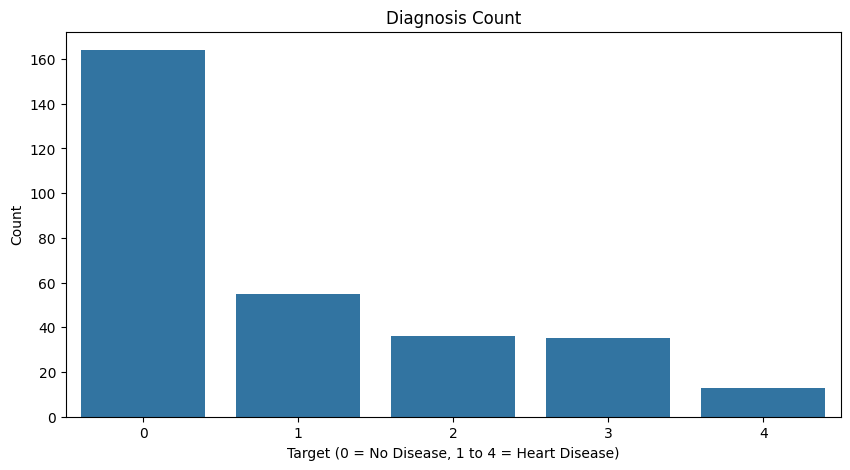

In [ ]:
df['target']

fig = plt.figure(figsize = (10,5))

sns.countplot(x='target', data=df)
plt.title('Diagnosis Count')
plt.xlabel('Target (0 = No Disease, 1 to 4 = Heart Disease)')
plt.ylabel('Count')
plt.show()

####**2. Exploratory Data Analysis**
---

After inspection we see that the data has been pre-cleaned so we are ready to perform some EDA. We begin by setting all values of `target` greater than 0 to 1.


In [ ]:
df_binary = df.copy()
df_binary['target'] = df_binary['target'].transform(lambda x: 0 if x == 0 else 1)

df_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


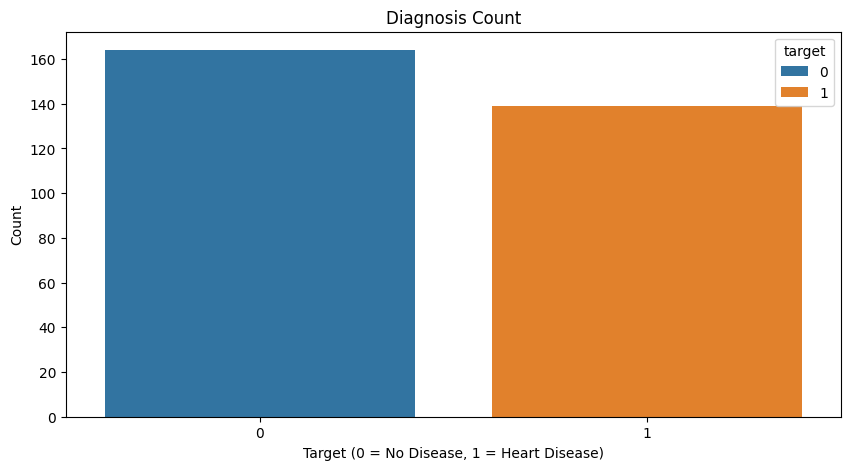

target
0    164
1    139
Name: count, dtype: int64


In [ ]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='target', data = df_binary, hue='target')
plt.title('Diagnosis Count')
plt.xlabel('Target (0 = No Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

print(df_binary['target'].value_counts())

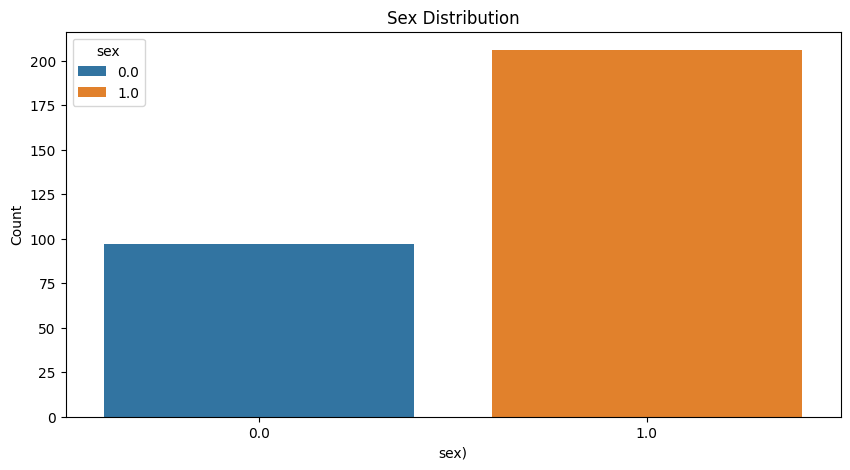

sex
1.0    206
0.0     97
Name: count, dtype: int64


In [ ]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='sex', data = df_binary, hue='sex')
plt.title('Sex Distribution')
plt.xlabel('sex)')
plt.ylabel('Count')
plt.show()

print(df_binary['sex'].value_counts())

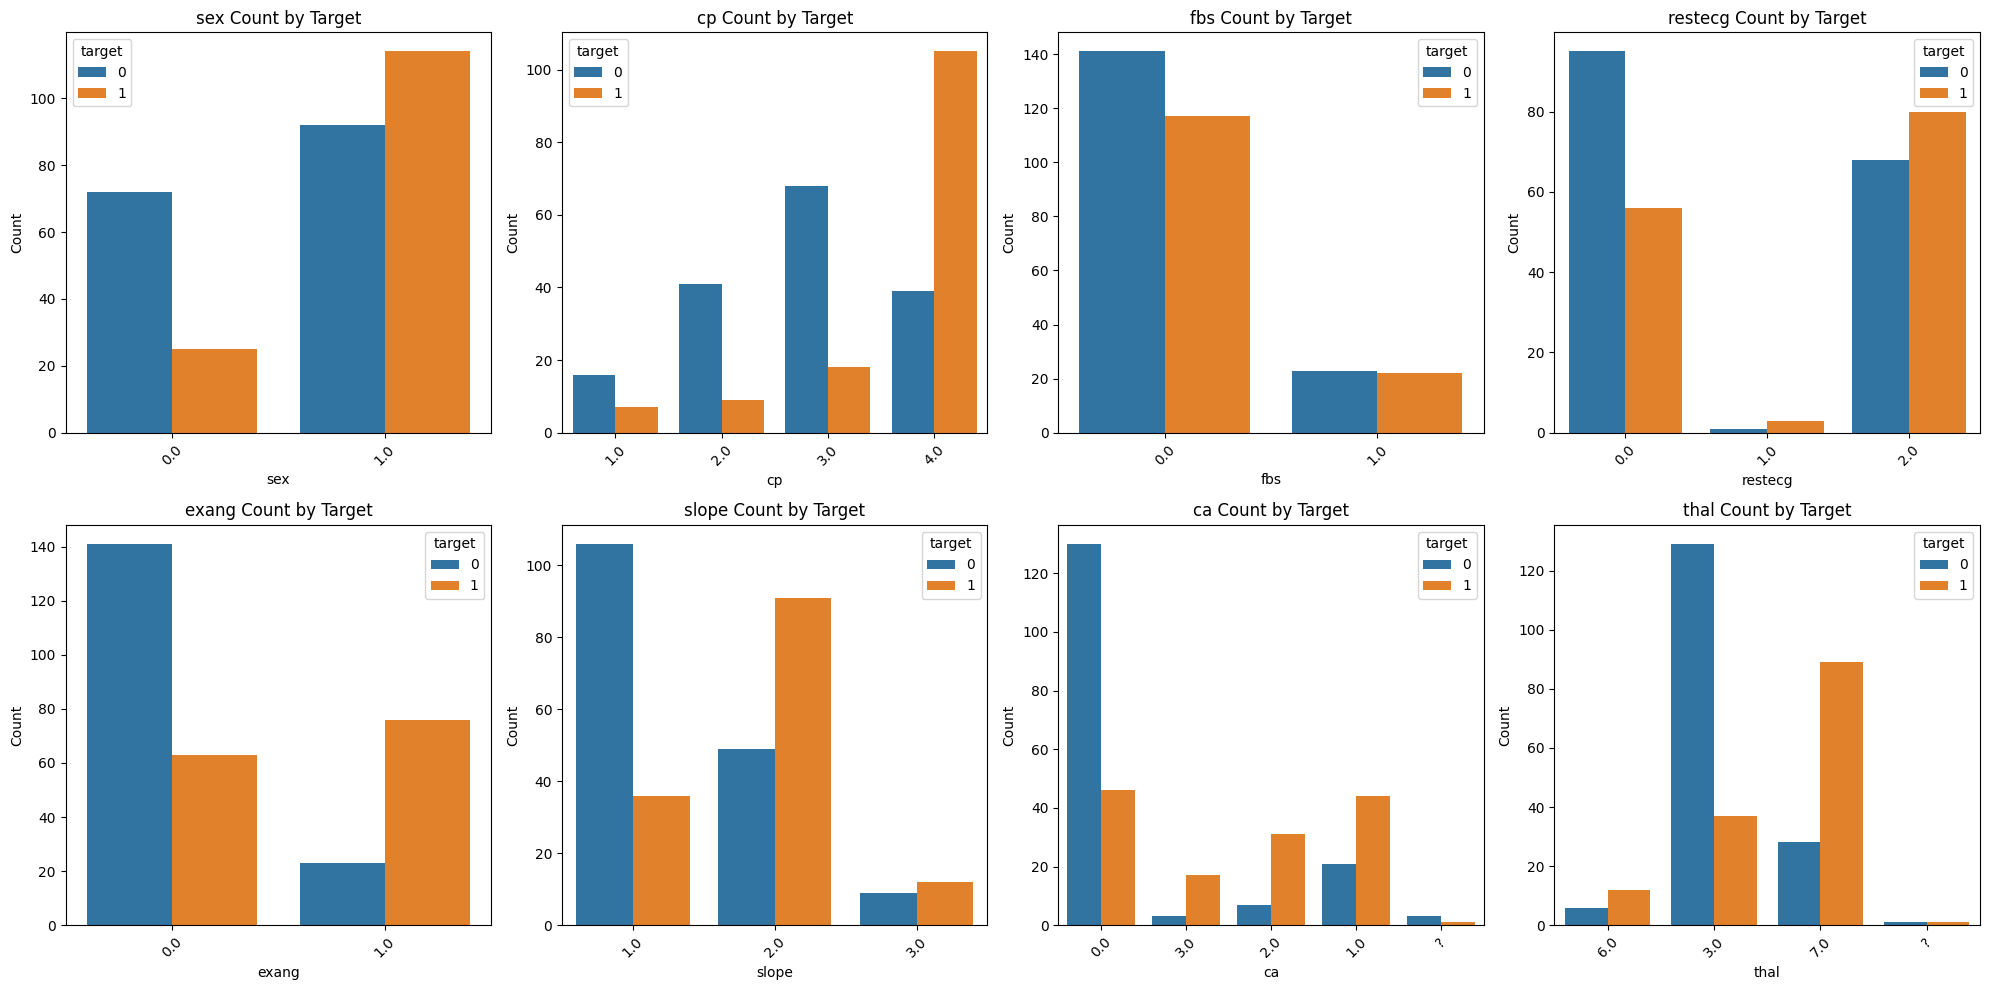

In [ ]:
exclude_cols = ["target", "age", "trestbps", "chol", "thalach", "oldpeak"]
cols_to_plot = [col for col in df_binary.columns if col not in exclude_cols]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(cols_to_plot):
    sns.countplot(x=column, data=df_binary, hue='target', ax=axes[i])
    axes[i].set_title(f"{column} Count by Target")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

graph separately: age, trestbp, chol, thalach, oldpeak

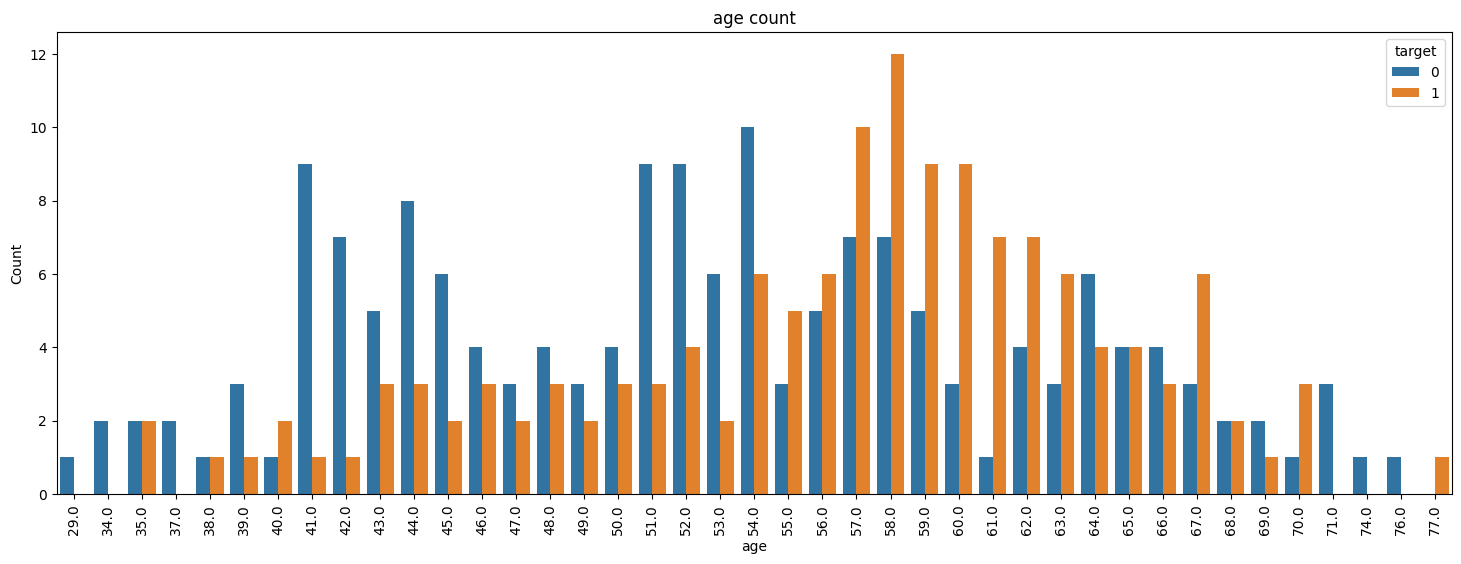

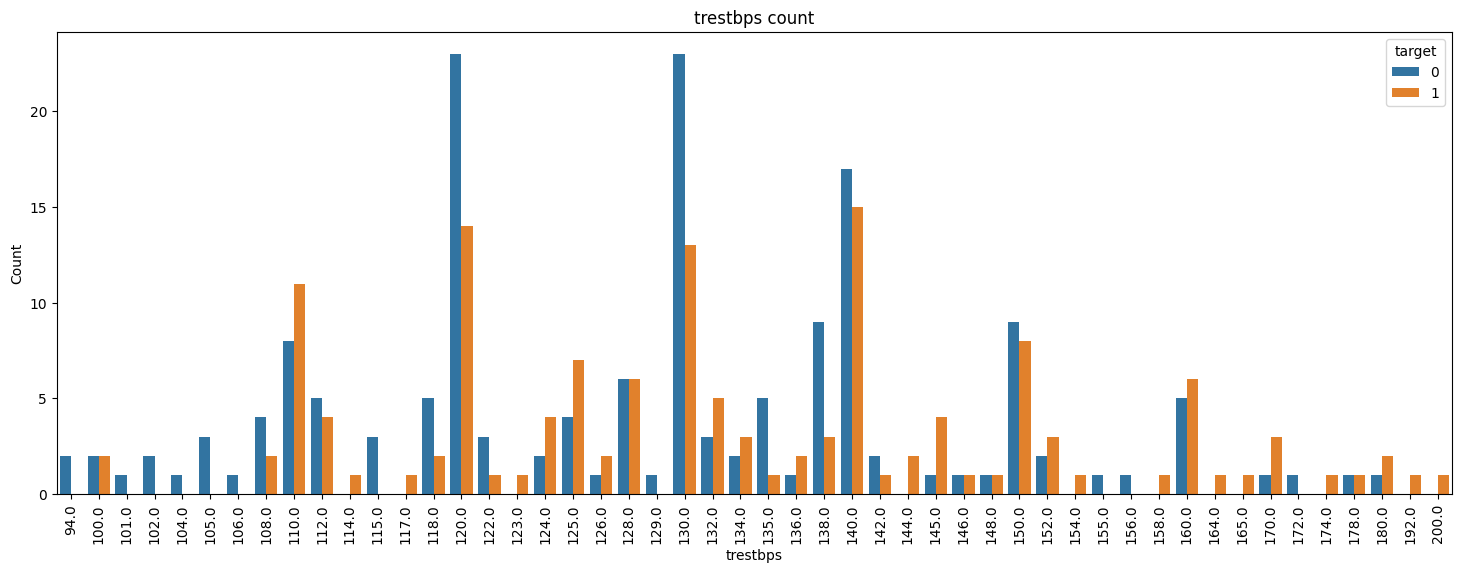

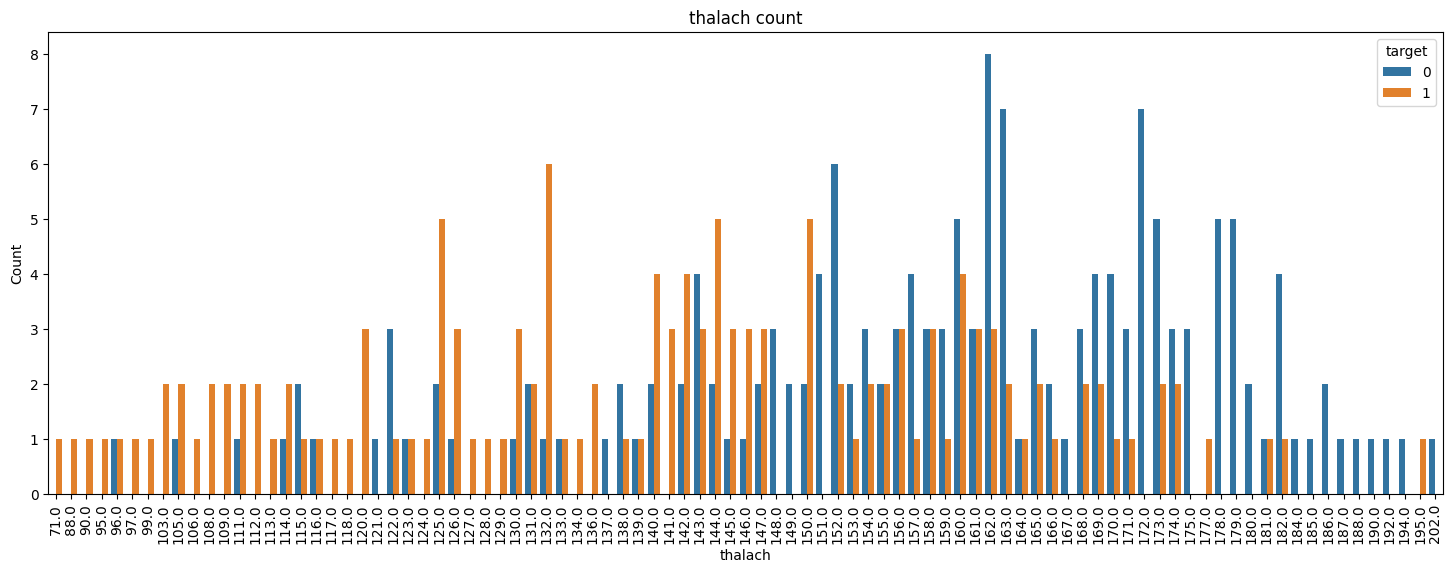

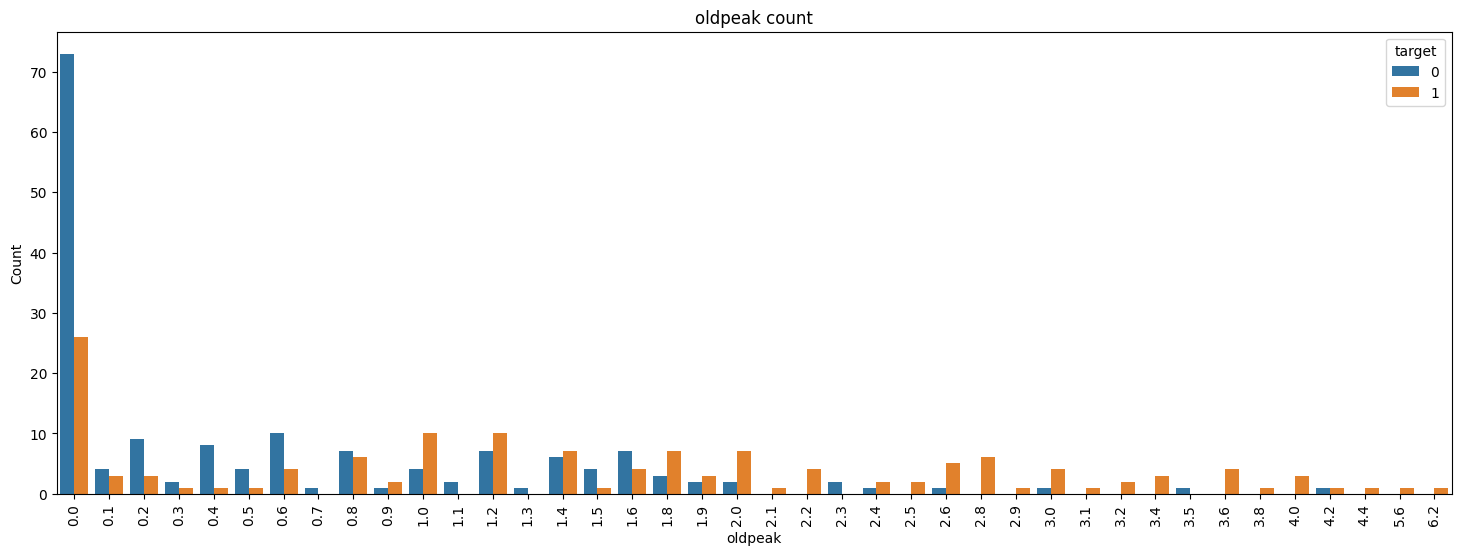

In [ ]:
columns = ["age", "trestbps", "thalach", "oldpeak"]
for column in columns:
  fig = plt.figure(figsize=(18, 6))
  sns.countplot(x=column, data=df_binary, hue='target')
  plt.title(column+' count')
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.show()

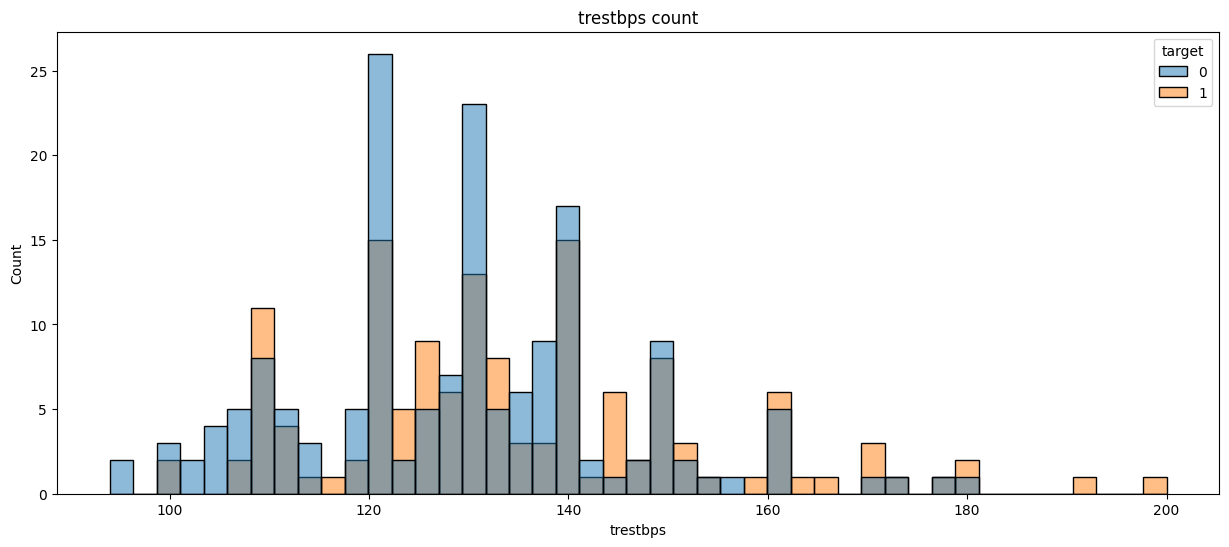

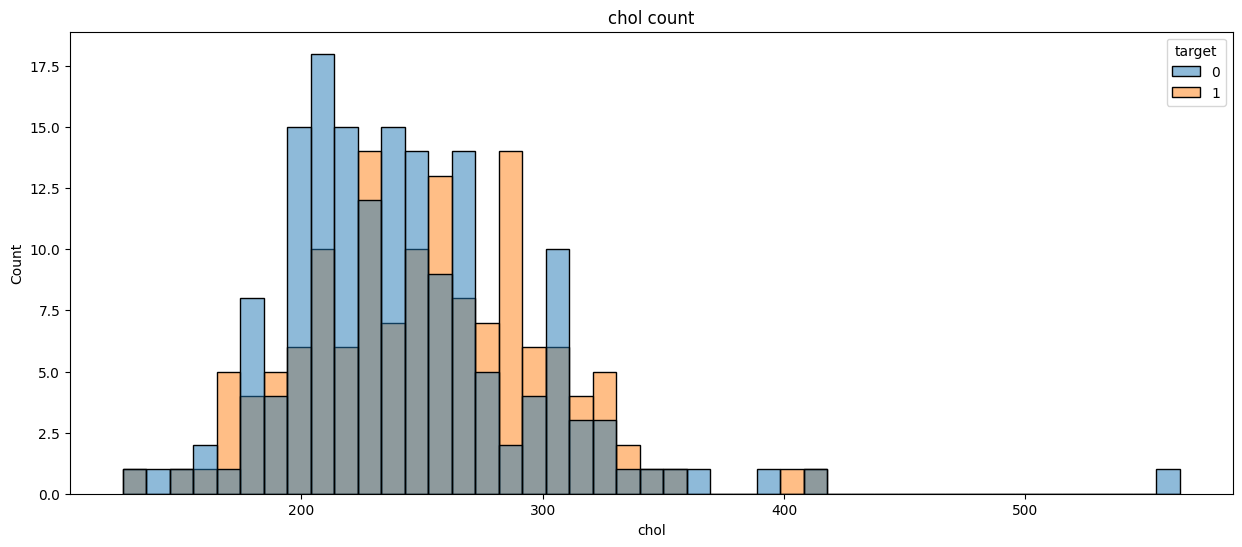

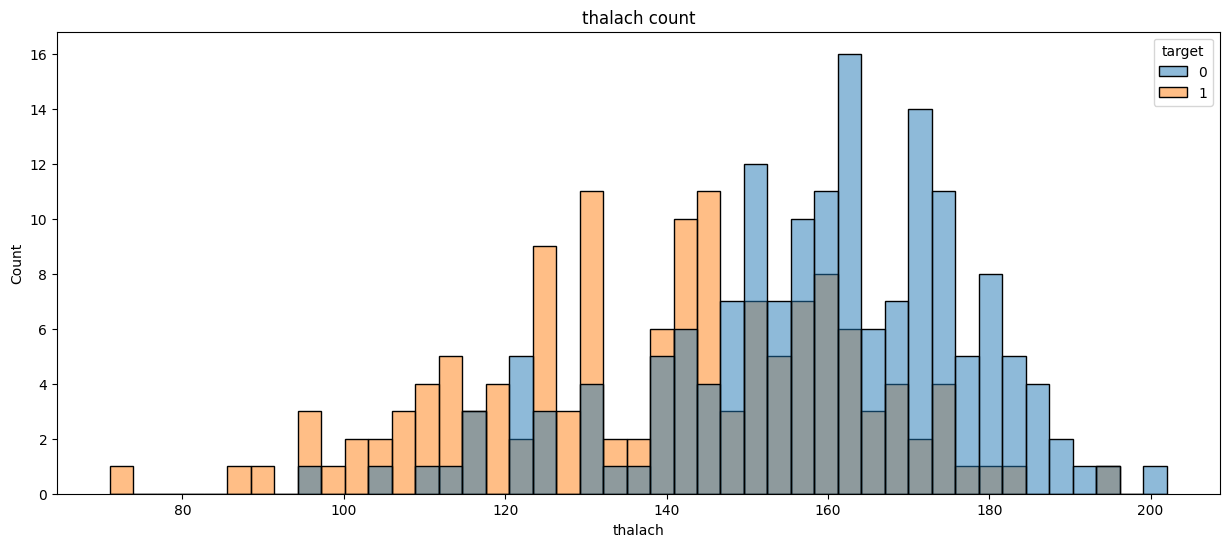

In [ ]:
columns = [ "trestbps", "chol", "thalach"]
for column in columns:
  fig = plt.figure(figsize=(15, 6))
  sns.histplot(x=column, data=df_binary, hue='target', bins=45)
  plt.title(column+' count')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

###**2.1. Exploratory Data Analysis (EDA) Insights**
####**1. Demographic Trends**

**Sex:**
Males appear more prone to heart disease than females. Although the dataset has roughly twice as many males, their positive cases are disproportionately higher. Sex may contribute to risk but inconclusive due to sample imbalance.

**Age:**
Heart disease cases increase steadily and peak around age 58, then decline, possibly due to survival bias. Negatives peak at 41, 51, and 58, suggesting different life stages for diagnosis or awareness.

---

####2.  **Clinical Features**

**Chest Pain Type (cp)**:
The highest number of heart disease positives occurs at cp = 4.0, indicating strong association with heart disease.

**Fasting Blood Sugar (fbs)**:
Both positives and negatives are more common when fbs = 0, implying that fasting blood sugar alone is a weak predictor.

**Exercise-Induced Angina (exang)**:
When exang = 0, heart disease negatives dominate. At exang = 1, positives slightly exceed negatives, showing limited standalone predictive value.

**Slope (slope of peak exercise ST segment)**:

slope = 1: many positives (100+) and few negatives

slope = 2: more negatives

slope = 3: rare overall
This suggests slope interacts with other features (like: thalach or oldpeak) for better prediction.

**Number of Major Vessels (ca)**:
ca = 0 corresponds to most negatives (>120), but higher values appear across both classes, suggesting mixed predictive strength.

**Thalassemia (thal)**:
Most positives occur at thal = 3, while thal = 7 links to more negatives. Weak predictive ability when used alone.

---

####3. **Measured Heart Activity**

####**Maximum Heart Rate (thalach)**:
Heart disease positives are spread widely (71–174) with no strong peak. Negatives rise sharply above 140, peaking near 161, implying that lower maximum heart rate may signal heart disease.

####**ST Depression (oldpeak)**:
Shows an inverse relation — higher oldpeak values correspond to fewer positives and more negatives. This may be one of the stronger predictors.

---
###**Summary**

Stronger indicators:

* age

* cp (chest pain type)

* slope

* thalach (max heart rate)

* oldpeak (ST depression)

Weaker standalone predictors:

* sex

* fbs (fasting blood sugar)

* exang (exercise-induced angina)

* ca (major vessels)

* thal (thalassemia)
---

##**3. Statistical Validation:**

***



Now that we have identified what we believe are strong and weak predictors of heart disease, we will now perform validation to check if the relationships are statistically significant.



####**3.1. Correlation Mapping**

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_binary.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Cleveland Heart Disease Dataset")
plt.show()

ValueError: could not convert string to float: '?'

<Figure size 1000x600 with 0 Axes>

In [ ]:
df_binary = df_binary.replace('?', np.nan)
df_binary = df_binary.apply(pd.to_numeric, errors='ignore')

df_binary.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


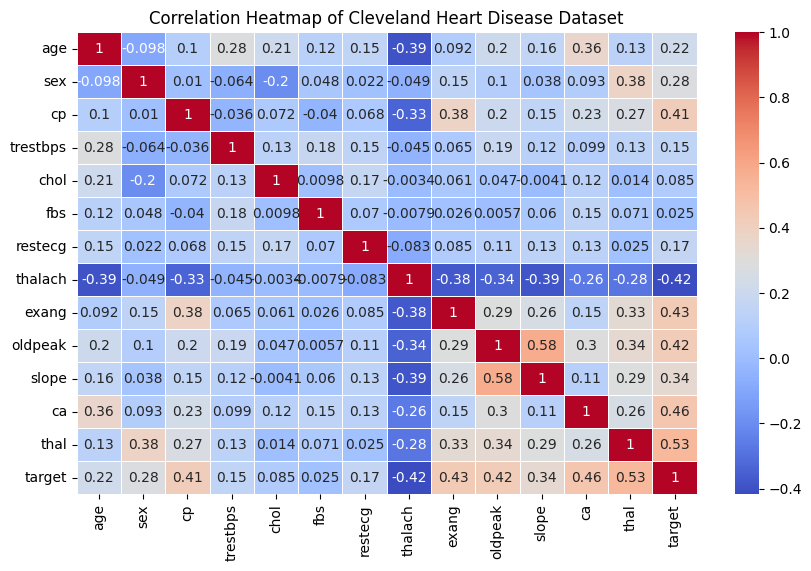

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_binary.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Cleveland Heart Disease Dataset")
plt.show()

The correlation matrix shows that the most correlated factors to `target` (heart disease) are:

 * `thal` (thalassemia) = 0.53,
 * `ca` (number of major vessels) = 0.46,
 * `exang` (exercised induced angina) = 0.43,
 * `oldpeak` (ST Depression) = 0.42, `
 * `cp` (chest pain) = 0.41.

 While the least correlated with `target` are:
 * `thalach` (maximum heart rate) = -0.42

(Negative correlation means that the higher the thalach, the lower the risk of heart disease.)

 * `fbs` (fasting blood sugar) = 0.025
 * `chol` (serum cholesterol) = 0.085
 * `trestbps` (resting blood pressure) = 0.15
 * `restecg` (resting ecg) = 0.17

 `age` and `sex` appear to have moderate correlation with heart disease.

 Factors that has high correlation with each other are the following:
 * `oldpeak` and `slope` at 0.58
 * `cp` and `exang` at 0.38

 `thal` correlates with the following:
 * `sex` = 0.38
 * `oldpeak` = 0.34
 * `exang` = 0.33
 * `slope` = 0.29

These correlation between variables may suggest *multicolinearity* which can mess up how our model understands their individual contributions to predicting `target`.

**Below we will statistically validate these correlations to determine which variables can genuibely improve the predictive accuracy of our model.**

---


####**3.2. Test of variable independence (Chi-squared test):**
---

In [ ]:
from scipy.stats import chi2_contingency

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal']

for col in categorical_cols:
    contingency_table = pd.crosstab(df_binary['target'], df_binary[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.5f}")

sex: p-value = 0.00000
cp: p-value = 0.00000
fbs: p-value = 0.78127
restecg: p-value = 0.00657
ca: p-value = 0.00000
exang: p-value = 0.00000
slope: p-value = 0.00000
thal: p-value = 0.00000


The chi-squared tests for the categorical variables yielded a **p-value < 0.05** except for the fasting blood sugar, `fbs` which yielded **p-value = 0.78**.

For **all** *categorical variables* **except** `fbs`, we have to **reject** the **null hypotheses** that they have no significant correlation with the independent varible `target`. These means that all categorical variables
can be used to predict heart disease except for fasting blood sugar.

####**3.3 Test of Multicollinearity (Variance Inflation Factor):**

---

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

#numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = df_binary[numeric_cols]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

#results
print(vif_data)


    Feature       VIF
0       age  1.346502
1  trestbps  1.131893
2      chol  1.059236
3   thalach  1.323332
4   oldpeak  1.174930


The variance inflation factor analysis we have obtained results that are **VIF < 2** for the variables
`age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.

This means there are **very low** to **no multicollinearity** in our numerical variables, making them safe for use in a machine learning model.


---


**Conclusion**:

Among the categorical variables, only `fbs` will not be used in training our machine learning model. All of our numerical variables will be used in training our model.


##**4. Model Training and Evaluation**

---

For this project we will be using the **K-Nearest Neighbors** algorithm using the **Sci-Kit Learn** library.   

####**4.1. Importing Modules and Scaling Data**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

####**4.2. Encoding Categorical Variables:**

We are excluding `fbs` based on the result of our chi-squared test.

In [ ]:
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_binary[col] = le.fit_transform(df_binary[col])
    label_encoders[col] = le


####**4.3. Feature Scaling:**

In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df_binary[numerical_cols] = scaler.fit_transform(df[numerical_cols])

####**4.4. Train-test Split:**

In [ ]:
X = df_binary.drop(columns=['target', 'fbs'])
y = df_binary['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


####**4.5. Model Training, Prediction and Model Evaluation:**

Confusion Matrix:
[[23 10]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61

Accuracy: 0.7869


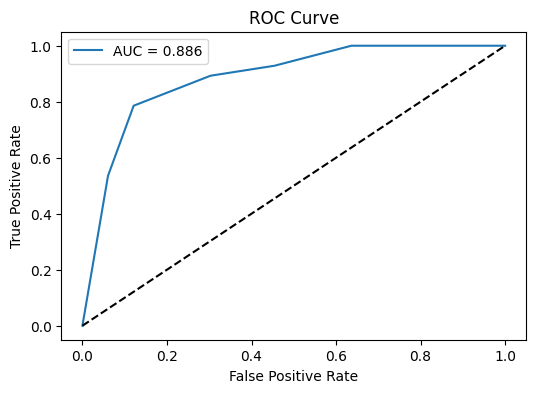

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# ROC Curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

####**4.6. Hyperparameter Tuning:**

---
At this point we wanna see if changing the value of k will give us better results. So we will loop over the values of k from 1 to 21 and graph the results to get a visual on the change in accuracy:

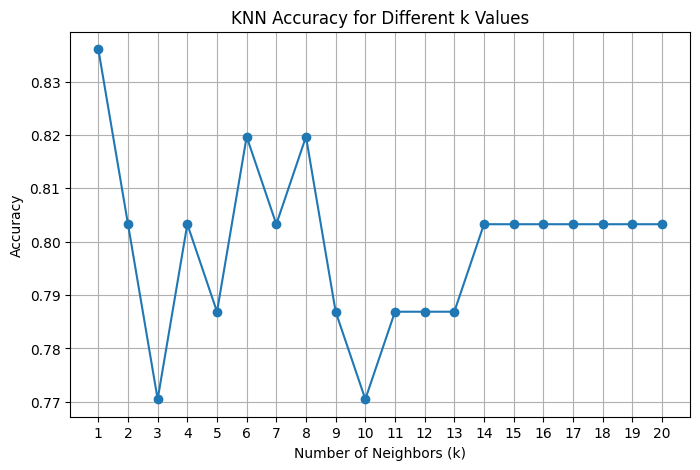

Best k = 1 with Accuracy = 0.836


In [ ]:
k_values = range(1, 21)
scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    scores.append(knn_temp.score(X_test, y_test))

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best k
best_k = k_values[scores.index(max(scores))]
print(f"Best k = {best_k} with Accuracy = {max(scores):.3f}")


##**4.7. Model Insight and Interpretation:**

---

Since we have already achieved the best *k-value* during hyperameter tuning, we will end the optimization here and will no longer perform other evaluation.

The optimal KNN model achieved **83.6%** accuracy and a strong ROC-AUC score, suggesting strong classifying ability.

Feature preprocessing and statistical screening using *chi-square* and *vif* improved model performance by ensuring only meaningful and independent variables were included.

Overall, the model demonstrates potential for early prediction of heart disease risk based on **clinical data**.


